# Lab 11 - Logistic Regression Continued

The Akimel O'odham people, who were also known as the Pima Indians since European colonization of the US, currently have a high prevalence of diabetes.   The Pima Indian Diabetest dataset contains different possible diabetes indicators and whether the person has diabetes is on [Kaggle](ttps://www.kaggle.com/uciml/pima-indians-diabetes-database) or available [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/diabetes.csv).

Load the dataset into a dataframe called `diabetes`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic

%matplotlib inline


In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Plot a scatter plot of glucose vs. diabetes.

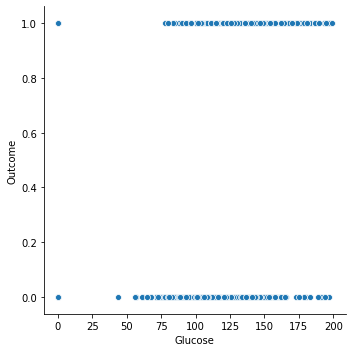

In [5]:
sns.relplot(x = "Glucose", y = "Outcome", data = diabetes)

Fit a logistic regression model to this data, using Glucose as the independent variable and Outcome as the dependent variable.

In [8]:
model = smf.logit("Outcome ~ Glucose", diabetes).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.526510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.1860
Time:                        17:13:15   Log-Likelihood:                -404.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.418e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3501      0.421    -12.713      0.000      -6.175      -4.525
Glucose        0.0379      0.003     11.647      0.000       0.031       0.044
==============================================================================
"""

What is the equation of the logistic regression model?

__P(Outcome) = 1 / (1 + e^-(-5.3501 + 0.03719 * Glucose))__

We can also plot the logistic regression model using Seaborn's `regplot()`.  Use `regplot()` as if you were doing linear regression on the variables, but add in the parameter `logistic = True`.

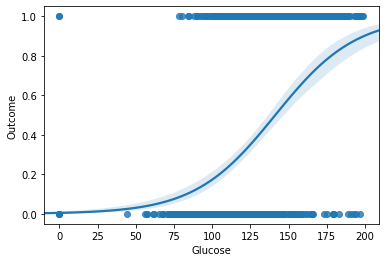

In [10]:
sns.regplot(x = "Glucose", y = "Outcome", data = diabetes, fit_reg = True, logistic = True)

Let's assess this model by computing the confusion matrix:

In [11]:
model.pred_table()

array([[443.,  57.],
       [138., 130.]])

In [111]:
# false positive - Type I error
fp = model.pred_table()[1][0]
fp

138.0

In [112]:
# false negative - Type II error
fn = model.pred_table()[0][1]
fn

57.0

What type of errors are most likely?

__Type I errors seem more likely than Type II errors__

Compute the sensitivity and specificity of our model:

In [113]:
# sensitivity (recall) - out of all the positives how many were actually predicted to be positive?
tp = model.pred_table()[0][0]
fn = model.pred_table()[0][1]

sens = tp / (tp + fn)
sens

0.886

In [114]:
# specificity (true negative rate) - out of all the negatives how many were actually predicted to be negative?
tn = model.pred_table()[1][1]
fp = model.pred_table()[1][0]

spec = tn / (tn + fp)
spec

0.48507462686567165

Based on the sensitivity and specificity, what are the strong and weak points of the model?

__The model is really good at predicting when an individual has diabetes but bad at predicting when an idividual does not have diabetes__

Remember that by default the confusion matrix uses 0.5 as the cut-off for whether a y value indicates 0  or 1.  We can change that by passing in the new cut-off as a parameter.  For example, to interpret values >= 0.7 as 1 and < 0.7 as 0, use the code:

In [23]:
model.pred_table(0.7)

array([[331., 169.],
       [ 66., 202.]])

How did the confusion matrix change?  Do you think this new model is better or worse?  Recompute the sensitivity and specificity.

__I believe the model both worsened and improved. Because one would need to sacrifice one measure for the other__

In [116]:
tp7 = model.pred_table(0.7)[0][0]
fn7 = model.pred_table(0.7)[0][1]
sens7 = tp7 / (tp7 + fn7)
sens7

0.968

In [115]:
tn7 = model.pred_table(0.7)[1][1]
fp7 = model.pred_table(0.7)[1][0]
spec7 = tn7 / (tn7 + fp7)
spec7

0.27238805970149255

How did the sensitivity and specificity change?  Are they better or worse?

__The sensitivity improved but the specificity worsened.__

### Logistic Regression with Multiple Independent Variables

Let's compute a logistic regression model using all of the columns as independent variables.

In [28]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
model2 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age", data = diabetes).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.2718
Time:                        19:26:47   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

Do any of the variables have higher p-values?  If so, let's create a new logistic regression model without those columns.

In [31]:
model3 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + Insulin + BMI + DiabetesPedigreeFunction + Age", data = diabetes).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.470998
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.2718
Time:                        19:27:42   Log-Likelihood:                -361.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.500e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4051      0.717    -11.727      0.000      -9.810      -7.000
Pregnancies                  0.1232      0.032      3.841      0.000       0.060       0.186
Glucose                      0.0351      0.004      9.587      0.000       0.028       0.042
BloodPressure               -0.0132      0.005     -2.564      0.010      -0.023      -0.003
Insulin                     -0.0012      0.001     -1.421      0.155      -0.003       0.000
BMI                          0.0901      0.014      6.229      0.000       0.062       0.118
DiabetesPedigreeFunction     0.9476      0.298      3.180      0.001       0.364       1.532
Age                          0.0148      0.009      1.592      0.111      -0.003       0.033
============================================================================================
"""

In [33]:
model4 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction + Age", data = diabetes).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.2698
Time:                        19:28:25   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

In [34]:
model5 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction", data = diabetes).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Oct 2019   Pseudo R-squ.:                  0.2667
Time:                        19:28:48   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Pregnancies                  0.1535      0.028      5.514      0.000       0.099       0.208
Glucose                      0.0347      0.003     10.213      0.000       0.028       0.041
BloodPressure               -0.0120      0.005     -2.387      0.017      -0.022      -0.002
BMI                          0.0848      0.014      6.006      0.000       0.057       0.113
DiabetesPedigreeFunction     0.9106      0.294      3.097      0.002       0.334       1.487
============================================================================================
"""

What's the equation for this logistic regression model?

__1 / (1 + e^-(-7.9550 + 0.1535 * Pregnancies + 0.0347 * Glucose - 0.0120 * BloodPressure + 0.0848 * BMI + 0.9106 * DiabetesPedigreeFunction))__ 

As before, let's compute the confusion matrix:

In [35]:
model5.pred_table()

array([[441.,  59.],
       [114., 154.]])

Do you think this is an improvement over the model based only on glucose?

__I believe this is an improvement over the model based only on glucose because there seems to be much more true positives.__

Compute the sensitivity and specificity:

In [117]:
tp_final = model5.pred_table()[0][0]
fn_final = model5.pred_table()[0][1]

sens_final = tp_final / (tp_final + fn_final)
sens_final

0.882

In [118]:
tn_final = model5.pred_table()[1][1]
fp_final = model5.pred_table()[1][0]

spec_final = tn_final / (tn_final + fp_final)
spec_final

0.5746268656716418

How do the sensitivity and specificity compare to the simpler model?  

__The sensitivity stayed the same but the specificity improved.__

### Challenges
- To better understand the data, plot the distributions of the Glucose column for people with diabetes and without diabetes as overlapping histograms.  How does this graph compare to the scatterplot of glucose vs. outcome?  Which gives more information?

__The distribution plot of the glucose concentrations gives much more information than the scatterplot of glucose vs outcome__

- (Very challenging) A *Receiver Operating Characteristic curve* or *ROC curve* gives information about the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the cut-off changes.  To plot such a curve, use a loop to compute the true positive rate and false positive rate for multiple cut-offs (eg. 0.1, 0.2, ..., 0.8, 0.9), and plot a line plot of these values with the false positive rate on the x axis and the true positive rate on the y axis.

Text(0, 0.5, 'Frequency')

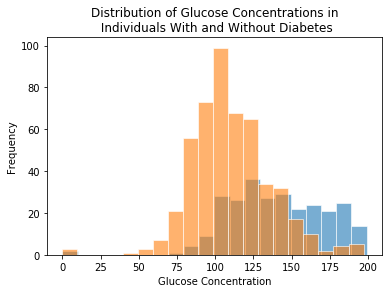

In [55]:
diabetes_filter = diabetes["Outcome"] == 1
no_diabetes_filter = diabetes["Outcome"] == 0

with_diabetes = diabetes[diabetes_filter]
no_diabetes = diabetes[no_diabetes_filter]

plt.hist(with_diabetes["Glucose"], alpha = 0.6, bins= 20, edgecolor = 'w')
plt.hist(no_diabetes["Glucose"], alpha = 0.6, bins = 20, edgecolor = 'w')
plt.title("Distribution of Glucose Concentrations in\n Individuals With and Without Diabetes")
plt.xlabel("Glucose Concentration")
plt.ylabel("Frequency")

In [106]:
cut_offs = np.linspace(0.1,0.9,200)
tp_rates = []
fp_rates = []

for cut_off in cut_offs:
    tp = model5.pred_table(cut_off)[0][0]
    fn = model5.pred_table(cut_off)[0][1]
    
    tp_rates.append(tp / (tp + fn))
    fp_rates.append(1 - (tp / (tp + fn)))

In [107]:
tp_rates = pd.Series(tp_rates)
fp_rates = pd.Series(fp_rates)

In [108]:
tp_rates

0      0.278
1      0.300
2      0.314
3      0.332
4      0.348
5      0.364
6      0.370
7      0.380
8      0.396
9      0.406
10     0.414
11     0.430
12     0.436
13     0.446
14     0.454
15     0.462
16     0.468
17     0.474
18     0.490
19     0.496
20     0.506
21     0.518
22     0.526
23     0.538
24     0.542
25     0.554
26     0.558
27     0.564
28     0.576
29     0.582
       ...  
170    0.982
171    0.984
172    0.984
173    0.984
174    0.984
175    0.984
176    0.984
177    0.984
178    0.984
179    0.986
180    0.986
181    0.986
182    0.986
183    0.986
184    0.986
185    0.986
186    0.986
187    0.986
188    0.988
189    0.990
190    0.990
191    0.990
192    0.990
193    0.990
194    0.990
195    0.990
196    0.990
197    0.994
198    0.994
199    0.994
Length: 200, dtype: float64

In [109]:
fp_rates

0      0.722
1      0.700
2      0.686
3      0.668
4      0.652
5      0.636
6      0.630
7      0.620
8      0.604
9      0.594
10     0.586
11     0.570
12     0.564
13     0.554
14     0.546
15     0.538
16     0.532
17     0.526
18     0.510
19     0.504
20     0.494
21     0.482
22     0.474
23     0.462
24     0.458
25     0.446
26     0.442
27     0.436
28     0.424
29     0.418
       ...  
170    0.018
171    0.016
172    0.016
173    0.016
174    0.016
175    0.016
176    0.016
177    0.016
178    0.016
179    0.014
180    0.014
181    0.014
182    0.014
183    0.014
184    0.014
185    0.014
186    0.014
187    0.014
188    0.012
189    0.010
190    0.010
191    0.010
192    0.010
193    0.010
194    0.010
195    0.010
196    0.010
197    0.006
198    0.006
199    0.006
Length: 200, dtype: float64